In [1]:
import game_v10
from player_p1 import PlayerP1
import numpy

Using TensorFlow backend.


In [2]:
game_train = game_v10.GameV10(mode="train")
#game_test = game_v10.GameV10(mode="test")

In [3]:
state_size = game_train.observation_space.shape[0]
action_size = game_train.action_space.n

In [4]:
player = PlayerP1(state_size, action_size)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [5]:
class Logger(object):
    def __init__(self):
        self.record_list = []
        
    def record(self, d):
        self.record_list.append(d)

def run(player, game, logger, mode, epoch=100):
    assert mode in ["train", "test"]
    for e in range(epoch):
        done= False
        power_list = []
        state = game.reset()
        while not done:
            action = player.get_action(state)
            next_state, reward, done, info = game.step(action)
            if mode == "train":
                player.train_model(state, action, reward, next_state, done)
            state = next_state
            power_list.append(game.power)
        logger.record(power_list)

In [6]:
logger_train = Logger()
run(player, game_train, logger_train, "train", epoch=100)
player.actor.save_weights("model/actor_weight.h5")
player.critic.save_weights("model/critic_weight.h5")


Instructions for updating:
Use tf.cast instead.


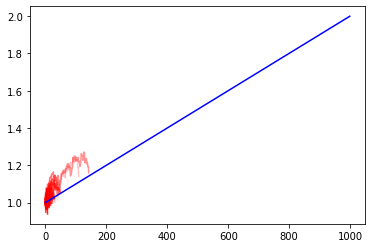

In [8]:
import matplotlib.pyplot as plt
n = len(logger_train.record_list)
for i in range(n):
    if i % 1 == 0:
        d = logger_train.record_list[i]
        plt.plot(range(len(d)), d, alpha=i/n, c="r")
x = numpy.array(range(1000))
cutline = x * 0.001 + 1
plt.plot(x, cutline, c="b")

In [ ]:
player.action_size